<a href="https://colab.research.google.com/github/Mohammad-Amin-Jenadele/VIT-Cifar-Training/blob/dev/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision Transformer (ViT) for CIFAR-10 Classification

Vision Transformer (ViT) is a novel architecture proposed for image classification tasks, introduced by Dosovitskiy et al. in the paper "[An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929)". Unlike traditional convolutional neural networks (CNNs), ViT leverages the Transformer architecture, originally designed for sequence modeling tasks like natural language processing, and applies it directly to image data.

## Motivation

Convolutional neural networks (CNNs) have been the cornerstone of computer vision tasks for years, demonstrating exceptional performance in various image recognition tasks. However, CNNs have certain limitations, especially when it comes to scalability and handling long-range dependencies within images. ViT addresses these limitations by reformulating image classification as a sequence-to-sequence problem, where image patches are treated as tokens similar to words in natural language processing tasks.

## Architecture

The core idea of ViT is to break down an input image into fixed-size patches, which are then linearly embedded into high-dimensional vectors. These patch embeddings, along with positional encodings, are fed into a standard Transformer encoder. The resulting sequence of embeddings is then passed through a classification head to produce the final class predictions.

## Key Components

1. **Patch Embeddings**: The input image is divided into non-overlapping patches, and each patch is linearly projected into a lower-dimensional embedding space.

2. **Positional Encodings**: To preserve spatial information, positional encodings are added to the patch embeddings, allowing the model to understand the relative positions of different patches.

3. **Transformer Encoder**: The patch embeddings, along with positional encodings, are fed into a Transformer encoder, which consists of multiple layers of self-attention mechanisms and feedforward neural networks.

4. **Classification Head**: The output sequence from the Transformer encoder is processed by a classification head, typically consisting of a single linear layer, to produce class probabilities.

## Advantages

- **Scalability**: ViT can handle images of arbitrary size, making it more scalable compared to traditional CNNs.
- **Interpretable**: The attention mechanism in ViT allows for better interpretability, as the model learns to focus on different parts of the image.
- **Transfer Learning**: ViT can be pre-trained on large-scale datasets and fine-tuned on specific tasks with relatively small amounts of labeled data.

## Project Goal

In this project, we aim to implement and train a Vision Transformer model on the CIFAR-10 dataset, a popular benchmark dataset for image classification.

Let's dive into the implementation!

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# IInstalling Vit package for keras
!pip install vit-keras

In [ ]:
# Installing tensorflow addons
!pip install tensorflow_addons

In [ ]:
# Importing required packages
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import utils
from vit_keras import vit , visualize
from vit_keras import utils as vit_utils

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
# Loading Cifar10 Dataset
# The loaded y_train , y_test and y_val are one hotted
(x_train, y_train), (x_test, y_test), (x_val, y_val) = utils.load_cifar10(val_ratio = 0.1)

In [ ]:
# Defining classes exist in Cifar10
classes = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' ,'truck' ]
num_to_class_dic = {i:classes[i] for i in range(len(classes))} # A dictionary that maps numbers 0 , 1 , 2 , ... to classes
class_to_num_dic = {classes[i]:i for i in range(len(classes))} # A dictionary that maps classes to numbers 0 , 1 , 2 , ...
print(f'number to class dictionary :\n{num_to_class_dic}')
print(f'class to number dictionary :\n{class_to_num_dic}')

number to class dictionary :
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
class to number dictionary :
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


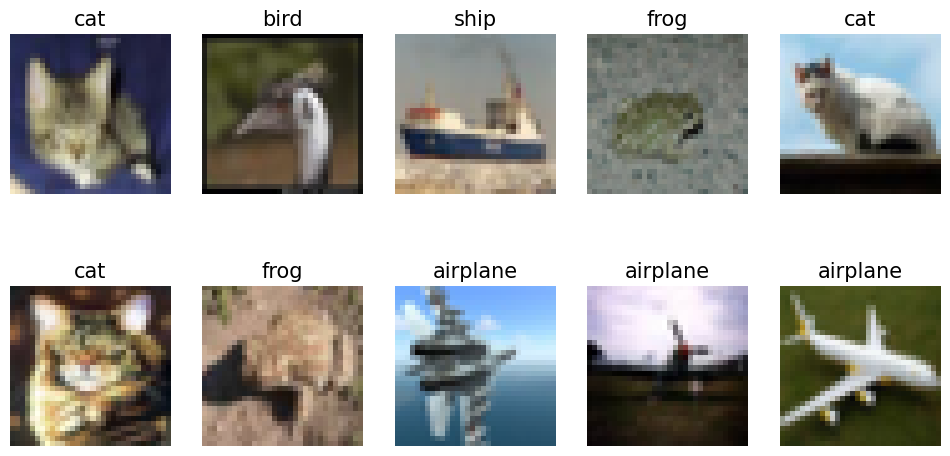

In [ ]:
# Plotting some samples from dataset
utils.sample_plot(x = x_train , y = y_train , num_to_class_dic = num_to_class_dic)

In [ ]:
# Using Vit-L32 for fine tunning
vit_b16 = vit.vit_b16(
    image_size=224,
    pretrained=True,
    include_top=False,
    pretrained_top=False,
)
vit_b16.trainable = False
customized_vit_b16_model = keras.models.Sequential([
    keras.layers.Input((x_train.shape[1] , x_train.shape[2] , 3)),  # Input shape : (32,32,3)
    keras.layers.UpSampling2D(size=(7, 7)),   # Resizing the input size ftom (32,32,3) to (224,224,3) to meet the required input for vit_b16
    vit_b16,
    keras.layers.Dense(256 , activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128 , activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64 , activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10 , activation = 'softmax') # Output layer
])


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


In [ ]:
customized_vit_b16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2  (None, 224, 224, 3)       0         
 D)                                                              
                                                                 
 vit-b16 (Functional)        (None, 768)               85798656  
                                                                 
 dense (Dense)               (None, 256)               196864    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

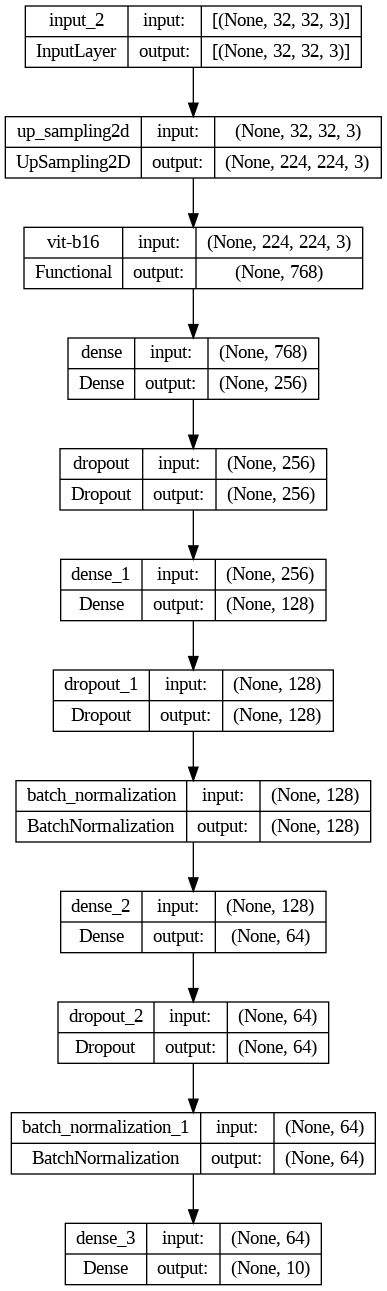

In [ ]:
from keras.utils import plot_model
plot_model(customized_vit_b16_model, show_shapes=True, show_layer_names=True)

In [ ]:
# callbacks

# Checkpoint callback
from tensorflow.keras.callbacks import ModelCheckpoint
myCP = ModelCheckpoint(save_best_only=True,filepath='/content/drive/MyDrive/customized_vit_b16.h5',monitor = 'val_accuracy')

# Earlystopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, restore_best_weights=True) # Early stopping callback

In [ ]:
# Compiling the model
customized_vit_b16_model.compile(loss = keras.losses.CategoricalCrossentropy(), # if the output is one hotted , use CategoricalCrossentropy if not , use SparseCategoricalCrossentropy
                    optimizer = keras.optimizers.Adam(learning_rate = 3e-4),
                    metrics = ['accuracy', utils.precision, utils.recall]
                )
history = customized_vit_b16_model.fit(x_train , y_train , batch_size = 64 ,validation_data = (x_val , y_val) , epochs = 5 , callbacks = [early_stopping , myCP])

Epoch 1/5
704/704 [==============================] - ETA: 0s - loss: 0.8122 - accuracy: 0.7395 - precision: 0.8446 - recall: 0.6382

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


704/704 [==============================] - 739s 1s/step - loss: 0.8122 - accuracy: 0.7395 - precision: 0.8446 - recall: 0.6382 - val_loss: 0.4235 - val_accuracy: 0.8598 - val_precision: 0.9080 - val_recall: 0.8206
Epoch 2/5
704/704 [==============================] - 697s 990ms/step - loss: 0.4824 - accuracy: 0.8458 - precision: 0.8984 - recall: 0.7998 - val_loss: 0.3616 - val_accuracy: 0.8828 - val_precision: 0.9156 - val_recall: 0.8538
Epoch 3/5
704/704 [==============================] - 708s 1s/step - loss: 0.4179 - accuracy: 0.8656 - precision: 0.9047 - recall: 0.8305 - val_loss: 0.3614 - val_accuracy: 0.8752 - val_precision: 0.9085 - val_recall: 0.8564
Epoch 4/5
704/704 [==============================] - 713s 1s/step - loss: 0.3820 - accuracy: 0.8761 - precision: 0.9102 - recall: 0.8460 - val_loss: 0.3347 - val_accuracy: 0.8894 - val_precision: 0.9143 - val_recall: 0.8734
Epoch 5/5
704/704 [==============================] - 715s 1s/step - loss: 0.3590 - accuracy: 0.8820 - precision

313/313 [==============================] - 135s 423ms/step


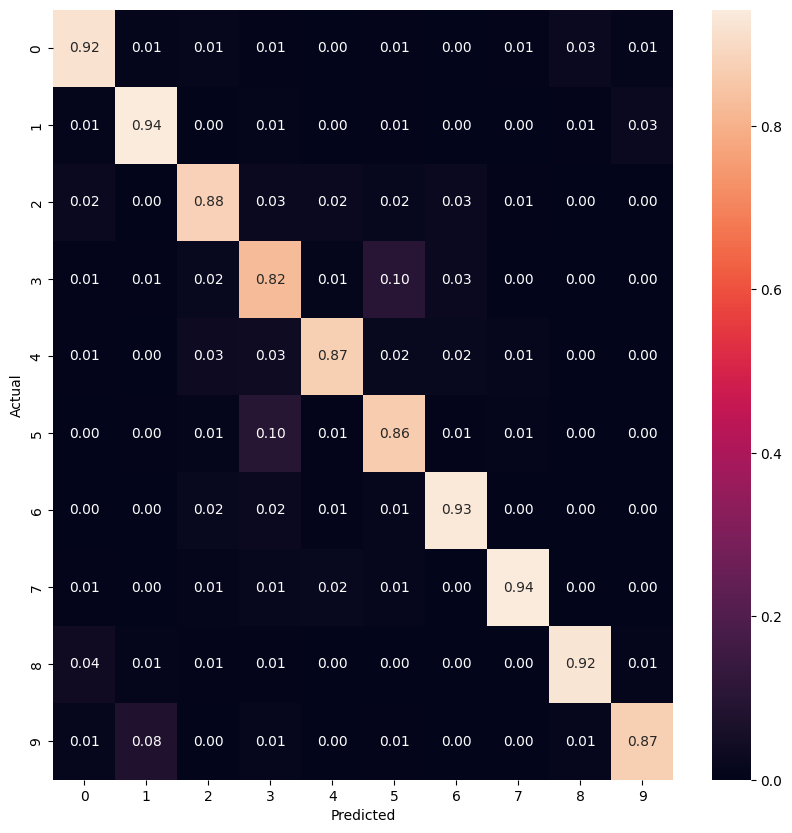

In [ ]:
# Plotting the confusion matrix
utils.plot_confusion_matrix(customized_vit_b16_model ,x_test , y_test)

In [ ]:
# Evaluating the x_test , y_test
customized_vit_b16_model.evaluate(x_test , y_test)

313/313 [==============================] - 133s 426ms/step - loss: 0.3118 - accuracy: 0.8964 - precision: 0.9192 - recall: 0.8785


[0.31182894110679626, 0.896399974822998, 0.9192191958427429, 0.878494381904602]